In [1]:
import logging
import time
import re
#logging.basicConfig(level=logging.DEBUG)

In [2]:
from chempiler import Chempiler
import ChemputerAPI

c = Chempiler(
    experiment_code="pt100_36",
    output_dir="\logs",
    graph_file="hotplate.json",
    device_modules=[ChemputerAPI],
    simulation=False,
)

In [3]:
def log_temp():
    temp, _ = c['hotplate'].send_message("IN_PV_1", True, re.compile("(\d+\.\d+) (\d+)\r\n"))
    timestamp = time.strftime("%H:%M:%S")
    return timestamp, temp

In [4]:
log_temp()

('13:45:19', '43.1')

In [5]:
c['hotplate'].send_message("IN_PV_1", True, re.compile("(\d+\.\d+) (\d+)\r\n"))

('42.9', '1')

In [6]:
c['hotplate'].temperature_hot_plate_pv

('24.7', '2')

In [7]:
c['hotplate'].temperature_pv

('42.9', '1')

In [8]:
times = []
temps = []

for _ in range(10800):
    ti, te = log_temp()
    times.append(ti)
    temps.append(te)
    print(_, ti, te)

0 13:45:37 42.9
1 13:45:39 42.8
2 13:45:40 42.8
3 13:45:42 42.8
4 13:45:43 42.8
5 13:45:45 42.7
6 13:45:47 42.7
7 13:45:48 42.7
8 13:45:50 42.7
9 13:45:52 42.6
10 13:45:53 42.6
11 13:45:55 42.6
12 13:45:56 42.5
13 13:45:58 42.5
14 13:46:00 42.5
15 13:46:01 42.5
16 13:46:03 42.4
17 13:46:05 42.4
18 13:46:06 42.4
19 13:46:08 42.4
20 13:46:09 42.3
21 13:46:11 42.3
22 13:46:13 42.3
23 13:46:14 42.3
24 13:46:16 42.2
25 13:46:18 42.2
26 13:46:19 42.2
27 13:46:21 42.2
28 13:46:22 42.2
29 13:46:24 42.1
30 13:46:26 42.1
31 13:46:27 42.1
32 13:46:29 42.1
33 13:46:31 42.0
34 13:46:32 42.0
35 13:46:34 42.0
36 13:46:35 42.0
37 13:46:37 41.9
38 13:46:39 41.9
39 13:46:40 41.9
40 13:46:42 41.9
41 13:46:44 41.9
42 13:46:45 41.8
43 13:46:47 41.8
44 13:46:48 41.8
45 13:46:50 41.8
46 13:46:52 41.7
47 13:46:53 41.7
48 13:46:55 41.7
49 13:46:57 41.7
50 13:46:58 41.6
51 13:47:00 41.6
52 13:47:01 41.6
53 13:47:03 41.6
54 13:47:05 41.5
55 13:47:06 41.5
56 13:47:08 41.5
57 13:47:10 41.5
58 13:47:11 41.4
59 13:4

In [37]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib

In [98]:
df = pd.DataFrame(data=[times, temps]).T
df.columns = ["times", "temps"]
df.head()

,times,temps
0,13:45:37,42.9
1,13:45:39,42.8
2,13:45:40,42.8
3,13:45:42,42.8
4,13:45:43,42.8


([<matplotlib.axis.XTick at 0x221d2bbd580>,
 <a list of 9 Text major ticklabel objects>)

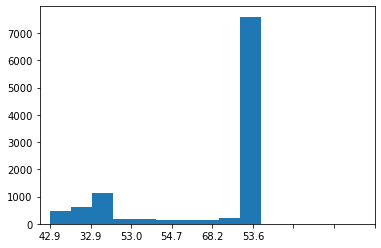

In [32]:
plt.hist(df.temps)
plt.xticks(np.arange(0, 900, step=100))

(0.0, 1000.0)

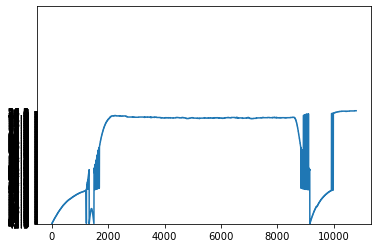

In [24]:
plt.plot(range(len(df.temps)), df.temps)
plt.ylim(0, 1000)

In [44]:
df.to_csv("fast_addition.csv")

In [41]:
from datetime import datetime

In [47]:
#df["datetime"] = df.times.apply(lambda x: datetime.strptime(x, "%H:%M:%S"))

In [52]:
dates = matplotlib.dates.datestr2num(df.times)

In [104]:
df["test"] = pd.to_datetime(df['times'], format='%H:%M:%S')

(array([693596.58333333, 693596.625     , 693596.66666667, 693596.70833333,
        693596.75      ]),
 <a list of 5 Text major ticklabel objects>)

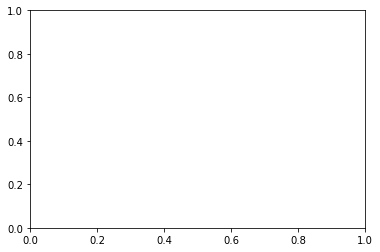

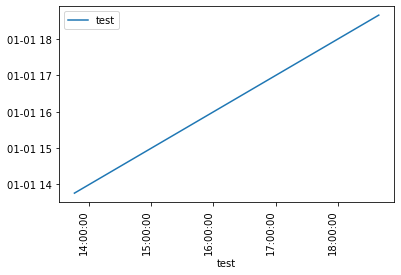

In [110]:
fig, ax = plt.subplots()

ax = df.set_index(df['test'], df["temps"]).plot()
xfmt = matplotlib.dates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=90)

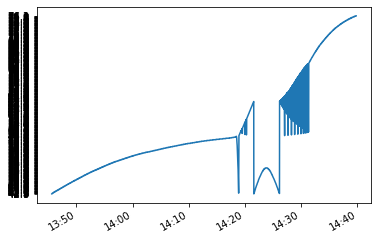

In [105]:
#dates = matplotlib.dates.date2num(df.datetime)
f, ax = plt.subplots()

plt.plot(df.test[:2000], df.temps[:2000])

# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)




#ymin, ymax = ax.get_ylim()
#ax.set_yticks(np.round(np.linspace(0, 100, 100), 2))

In [101]:
df.tail()

,times,temps
10795,18:39:36,26.0
10796,18:39:38,26.0
10797,18:39:40,26.0
10798,18:39:41,26.0
10799,18:39:43,26.0


In [72]:
df.temps.describe()

count     10800
unique      521
top        76.9
freq       1474
Name: temps, dtype: object

In [73]:
max(df.temps)

'78.0'

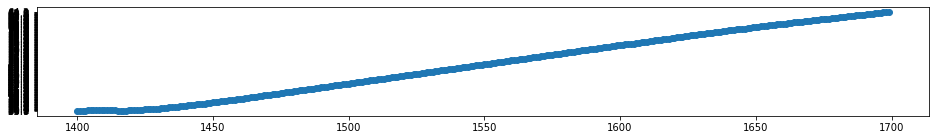

In [91]:
plt.figure(figsize=(16, 2))

plt.scatter(df.index[1400:1700], df.temps[1400:1700])

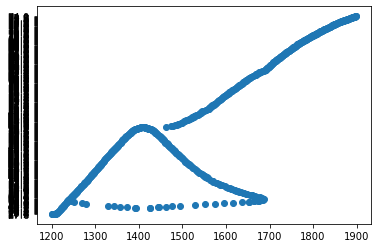

In [95]:
plt.scatter(df.index[1200:1900], df.temps[1200:1900])

In [97]:
df = df.sort_values(df.index, ascending=[True])

KeyError: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10790, 10791, 10792, 10793, 10794, 10795, 10796, 10797, 10798,
            10799],
           dtype='int64', length=10800)